# Exploring the Final Project's Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### EU Dataset

In [2]:
unit = {
    'total_rail_traffic': 'million train-km',
    'passenger_services': '% train-km',
    'billion_passenger_km': 'billion passenger-km',
    'population': 'number',
    'size': 'km2'
}

eu = pd.read_csv('data/trains_europe.csv')
eu.rename(
    columns = {
        'total_rail_traffic (million train-km)': 'total_rail_traffic',
        'passenger_services (% train-km)': 'passenger_services',
        'billion_passenger_km': 'billion_passenger_km',
        'population': 'population',
        'size (km2)': 'size'
    },
    inplace = True
)
eu.head(10)

,country,year,total_rail_traffic,passenger_services,billion_passenger_km,population,size
0,Austria,2020,162.0,0.70,7.4,8916864,82520.00
1,Belgium,2020,93.0,0.87,7.9,11544241,30280.00
2,Bulgaria,2020,30.0,0.70,1.1,6934015,108560.00
3,Croatia,2020,20.0,0.64,0.4,4047680,55960.00
4,Czech Republic,2020,168.0,0.79,6.5,10697858,77198.53
5,Denmark,2020,89.0,0.96,4.3,5831404,40000.00
6,Estonia,2020,6.0,0.82,0.3,1329479,42750.00
7,Finland,2020,48.0,0.71,2.8,5529543,303940.00
8,France,2020,355.0,0.85,53.8,67379908,547557.00
9,Germany,2020,1091.0,0.77,59.5,83160871,349390.00


In [3]:
def plot_eu(column, pandemic = False, per_size = False, per_capita = False):
    eu_temp = eu.copy()

    # Per size
    if per_size:
        eu_temp[column] = eu.apply(lambda row: row[column] / row['size'] * 10000, axis = 1)
    
    # Per capita
    if per_capita:
        eu_temp[column] = eu.apply(lambda row: row[column] / row['population'] * 10000, axis = 1)
    
    # Pivot table
    eu_p = eu_temp.pivot(index = 'year', columns = 'country', values = column).reset_index()

    # Zoom on pandemic years
    if pandemic:
        eu_p = eu_p.loc[eu_p['year'] >= 2019]

    # Make plot
    for col in eu_p.drop('year', axis = 1):
        if col == 'Switzerland':
            continue
        plt.plot(
            eu_p['year'],
            eu_p[col],
            marker = '',
            color = 'grey',
            linewidth = 1,
            alpha = 0.5
        )
        plt.text(
            x = 2020.2,
            y = eu_p.iloc[-1][col],
            s = col,
            horizontalalignment='left',
            size='small',
            color='grey'
        )

    # Highlight Switzerland
    plt.plot(
        eu_p['year'],
        eu_p['Switzerland'],
        marker = '',
        color = 'red',
        linewidth = 3,
        alpha = 1
    )
    plt.text(
            x = 2020.2,
            y = eu_p.iloc[-1]['Switzerland'],
            s = 'Switzerland',
            horizontalalignment='left',
            size='large',
            color='red'
        )


    # Formatting
    plt.title(f"{column}{' per 10k km2' if per_size else ''}{' per 10k inhabitants' if per_capita else ''}")
    plt.xlabel('Year')
    plt.ylabel(f"{unit[column]}{' per 10k km2' if per_size else ''}{' per 10k inhabitants' if per_capita else ''}")

    plt.show()

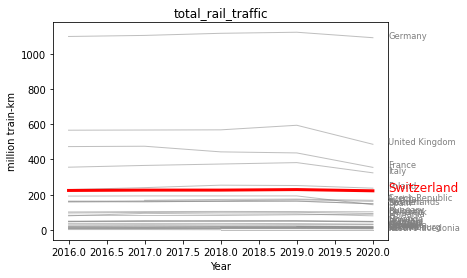

In [4]:
plot_eu('total_rail_traffic', pandemic = False)

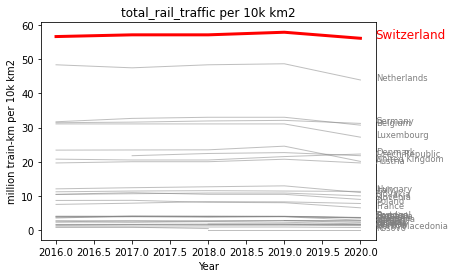

In [5]:
plot_eu('total_rail_traffic', pandemic = False, per_size = True)

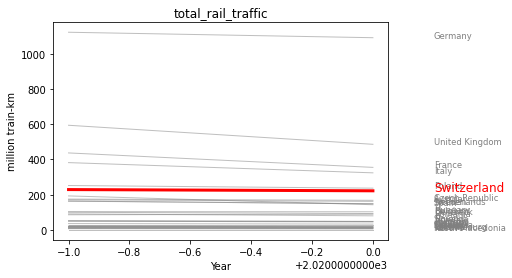

In [6]:
plot_eu('total_rail_traffic', pandemic = True)

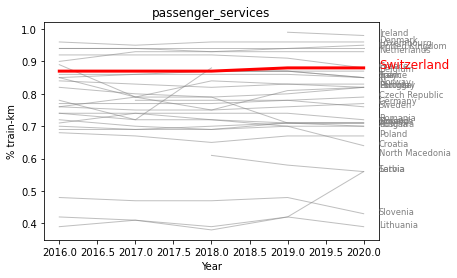

In [7]:
plot_eu('passenger_services', pandemic = False)

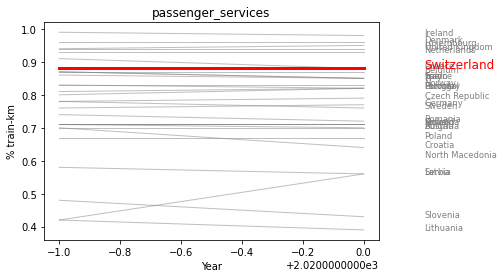

In [8]:
plot_eu('passenger_services', pandemic = True)

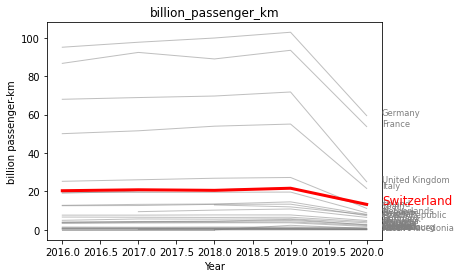

In [9]:
plot_eu('billion_passenger_km', pandemic = False)

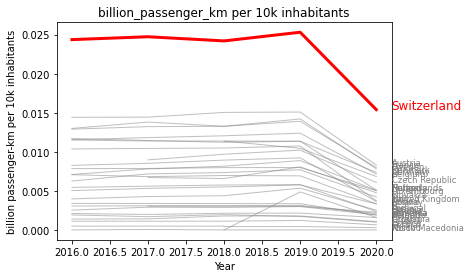

In [10]:
plot_eu('billion_passenger_km', pandemic = False, per_capita = True)

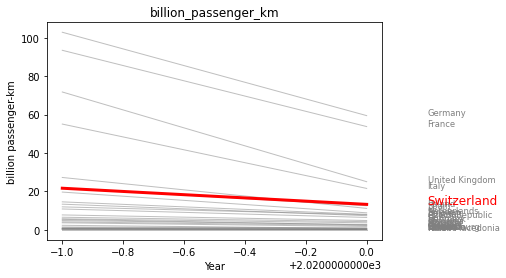

In [11]:
plot_eu('billion_passenger_km', pandemic = True)

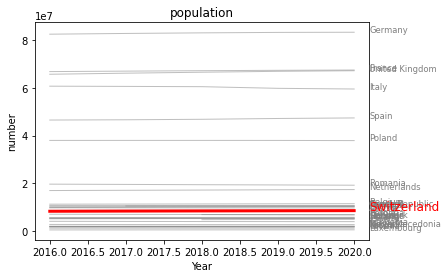

In [12]:
plot_eu('population', pandemic = False)

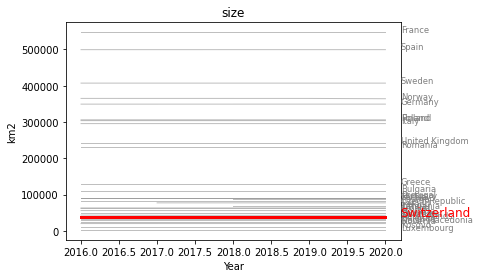

In [13]:
plot_eu('size', pandemic = False)

### Swiss Dataset

In [14]:
unit = {
    'train_km': 'million km',
    'ld_train_km': 'million km',
    'cargo_train_km': 'million km',
    'passenger_km': 'million km',
    'passengers_per_day': 'million passengers',
    'avg_passengers_per_train': 'passengers',
    'avg_travel_distance_per_passenger': 'km',
    'passenger_energy_cons': 'kWh/100 Pkm',
    'cargo_energy_cons': 'kWh/100 Ntkm',
    'greenhouse_per_passenger': 'g/100 Pkm',
    'greenhouse_per_cargo': 'g/100 Ntkm',
    'greenhouse': 'T'
}

ch = pd.read_csv('data/trains_switzerland.csv')
ch.rename(
    columns = {
        'Year': 'year',
        'train-km (mio)': 'train_km',
        'train-km_long_distance (mio)': 'ld_train_km',
        'train-km_cargo (mio)': 'cargo_train_km',
        'passenger-km (mio)': 'passenger_km',
        'passengers_per_day (mio)': 'passengers_per_day',
        'avg_passengers_per_train': 'avg_passengers_per_train',
        'avg_travel_distance_per_passenger': 'avg_travel_distance_per_passenger',
        'energy_consumption_passenger (kWh/100 Pkm)': 'passenger_energy_cons',
        'energy_consumption_cargo (kWh/100 Ntkm)': 'cargo_energy_cons',
        'greenhouse_gas_passenger (g/100 Pkm)': 'greenhouse_per_passenger',
        'greenhouse_gas_cargo (g/100 Ntkm)': 'greenhouse_per_cargo'
    },
    inplace = True
)
ch['greenhouse'] = ch.apply(lambda row: row['greenhouse_per_passenger'] * row['passenger_km'] * 1000000 / 100 / 1000000, axis = 1)
ch

,year,train_km,ld_train_km,passenger_km,passengers_per_day,avg_passengers_per_train,avg_travel_distance_per_passenger,cargo_train_km,passenger_energy_cons,cargo_energy_cons,greenhouse_per_passenger,greenhouse_per_cargo,greenhouse
0,1903,NaN,NaN,1048.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1906,NaN,NaN,1434.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1907,NaN,NaN,1528.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2017,150.6,67.6,18501.4,1239427.0,125.4,39.7,36.3,8.5,4.3,14.6,171.7,2701.2044
115,2018,147.5,66.2,18608.1,1248908.0,126.9,39.8,36.2,8.4,4.3,15.5,188.2,2884.2555
116,2019,151.0,67.3,19689.2,1321790.0,131.0,39.7,35.3,7.9,4.4,14.5,188.0,2854.9340
117,2020,146.6,63.8,11705.1,843335.0,80.9,37.2,33.9,12.1,4.0,22.2,189.6,2598.5322


In [15]:
def plot_ch(column, pandemic = False, ch = ch):
    # Zoom on pandemic years
    if pandemic:
        ch = ch.loc[ch['year'] >= 2019]

    # Make plot
    plt.plot(
        ch['year'],
        ch[column],
        marker = '',
        color = 'red',
        linewidth = 3,
        alpha = 1
    )

    # Formatting
    plt.title(f'{column}')
    plt.xlabel('Year')
    plt.ylabel(unit[column])

    plt.show()

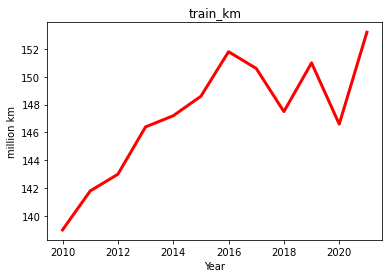

In [16]:
plot_ch('train_km', pandemic = False)

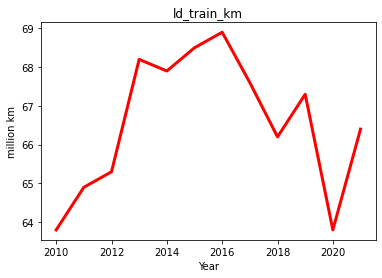

In [17]:
plot_ch('ld_train_km', pandemic = False)

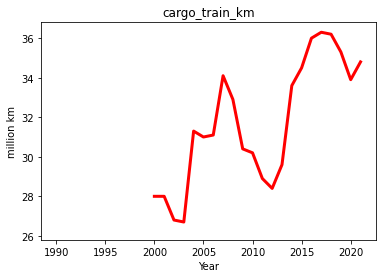

In [18]:
plot_ch('cargo_train_km', pandemic = False)

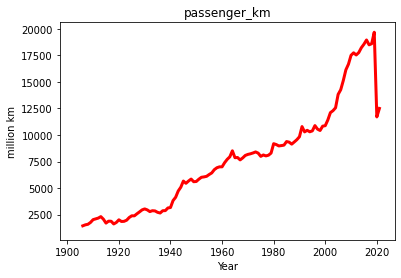

In [19]:
plot_ch('passenger_km', pandemic = False)

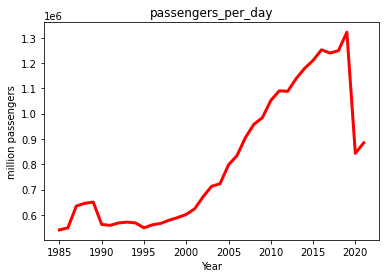

In [20]:
plot_ch('passengers_per_day', pandemic = False)

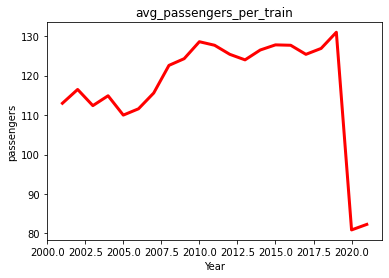

In [21]:
plot_ch('avg_passengers_per_train', pandemic = False)

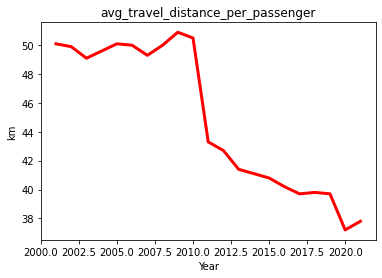

In [22]:
plot_ch('avg_travel_distance_per_passenger', pandemic = False)

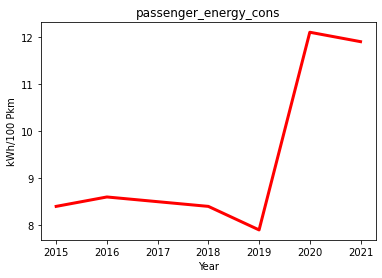

In [23]:
plot_ch('passenger_energy_cons', pandemic = False)

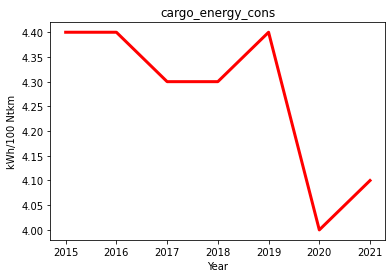

In [24]:
plot_ch('cargo_energy_cons', pandemic = False)

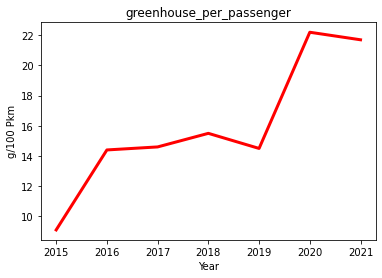

In [25]:
plot_ch('greenhouse_per_passenger', pandemic = False)

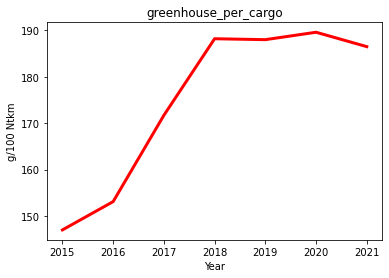

In [26]:
plot_ch('greenhouse_per_cargo', pandemic = False)

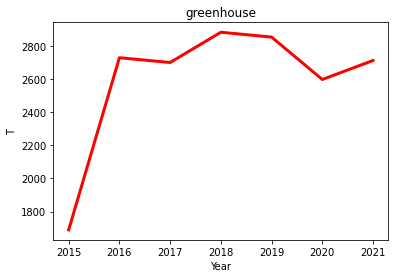

In [27]:
plot_ch('greenhouse', pandemic = False)